In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston, load_iris, load_diabetes, load_wine

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Dimensionality Reduction Techniques

In [ ]:
5000 rows + 100 features  >> 5 hrs

5000 rows + 50 features >> 3 hrs

# will increse performance 
# will save the time
# will save the cost

In [ ]:
Reduce the curse of dimentionality
1. Feature Selection:
    # Selection of best set of features from existing features
    
2. Feature Exctraction:
    # Combining the existing features and get new features, selecting best out of it.

### Feature Selection

In [ ]:
It is the way of selecting the subset of most relevant features
from original set of features
by removing irrelavent, noisy or redundent features.


# Benifits
- Reduce the curse of dimentionality
- improve performance/accuracy
- reduce training and testing time
- cost effectiveness

## Feature Selection Techniques

In [ ]:
1. Filter Method: After Gathering the data and before model training
    1. Correlation:
        1. Pearson Correlation Coefficient
        2. Spearman Correlation Coefficient
        3. Kendall Correlation Coefficient
    
    2. Fisher Score
    3. Variance Inflation Factor
    4. Missing Value ratio
    5. Variance Threshold Method
    6. Information Gain (Mutual Information)
    7. Chi-square Test
    8. ANNOVA Test (F-Test)
    
2. Wrapper Method: At the time of model training
    1. Forward Feature Selection
    2. Backward Feature Elimination
    3. Exhaustive Feature Selection
    4. Recursive Feature Elimination
    5. Bi-directional Feature Selection
    
3. Embedded Method: After Model Training
    1. Regularization:
        L1 Regularization (Lasso regression)
        
    2. Tree base models feature importance:
        1. Decision tree feature importance
        2. Random Forest feature importance
        3. AdaBoost feature Importance

### Feature Exctraction

In [ ]:
1. Principal Component Analysis (PCA)
2. Linear Descriminant Analysis (LDA)

# 1. Filter Method

### 1.1 Correlation

In [3]:
boston_df = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
boston_df['PRICE'] = load_boston().target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### Pearson

<AxesSubplot: >

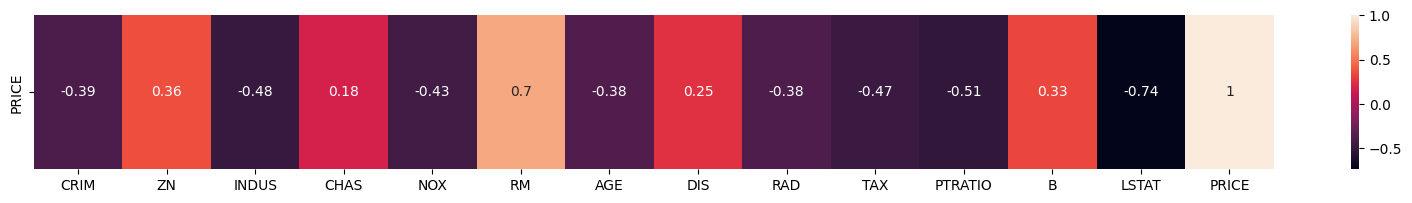

In [10]:
corr = boston_df.corr().tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr, annot=True)

<AxesSubplot: >

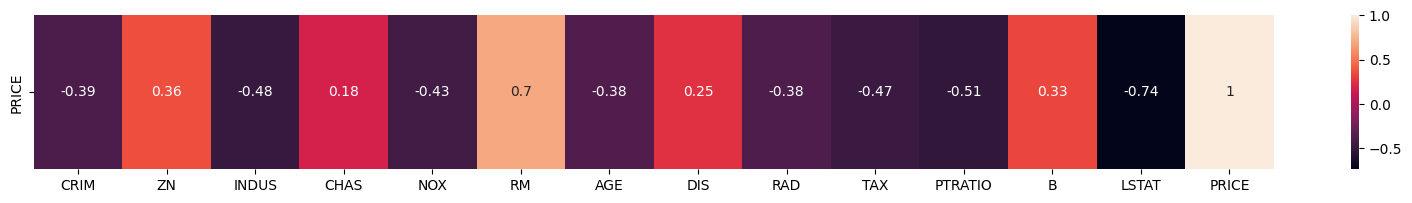

In [11]:
corr = boston_df.corr(method='pearson').tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr, annot=True)

In [ ]:
['pearson', 'kendall', 'spearman']

#### spearman correlation coeficient

<AxesSubplot: >

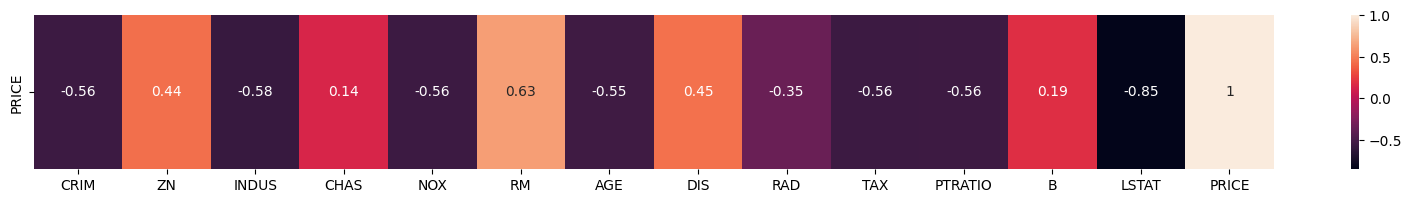

In [12]:
corr = boston_df.corr(method='spearman').tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr, annot=True)

In [14]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot: xlabel='CRIM', ylabel='PRICE'>

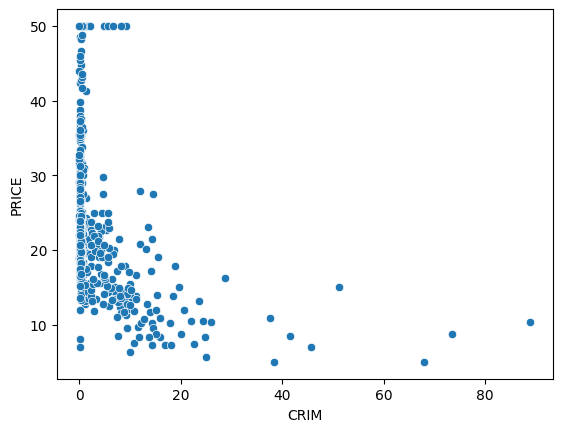

In [15]:
sns.scatterplot(x = boston_df['CRIM'], y= boston_df['PRICE'])

#### Kendall Correlation Coefficient

<AxesSubplot: >

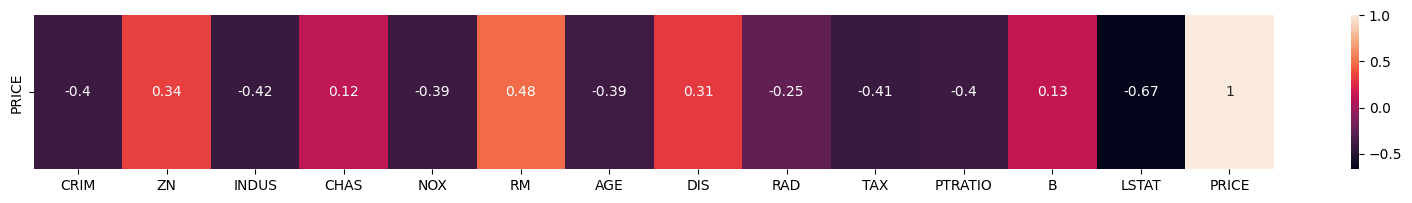

In [13]:
corr = boston_df.corr(method='kendall').tail(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr, annot=True)

### 2. Fisher Score

In [ ]:
It returns rank of variables based on Fisher Score

In [ ]:
pip install skfeature-chappers

In [16]:
from skfeature.function.similarity_based import fisher_score

In [27]:
x = pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
y = pd.Series(load_diabetes().target)
x.to_numpy()

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [28]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


<AxesSubplot: >

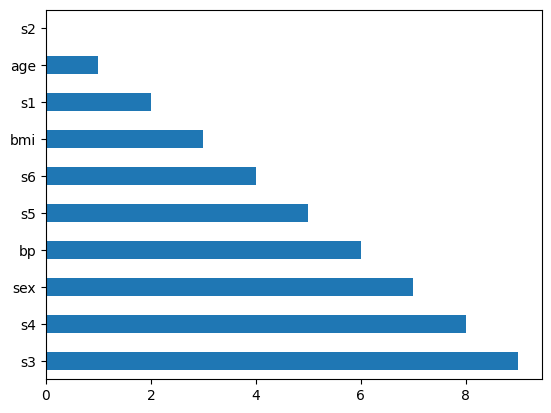

In [33]:
fisher_rank = fisher_score.fisher_score(x.to_numpy(), y)

s1 = pd.Series(fisher_rank, index=x.columns)

s1.sort_values(ascending=False).plot(kind = 'barh')

In [35]:
x = boston_df.drop("PRICE", axis=1)
y = boston_df['PRICE']

<AxesSubplot: >

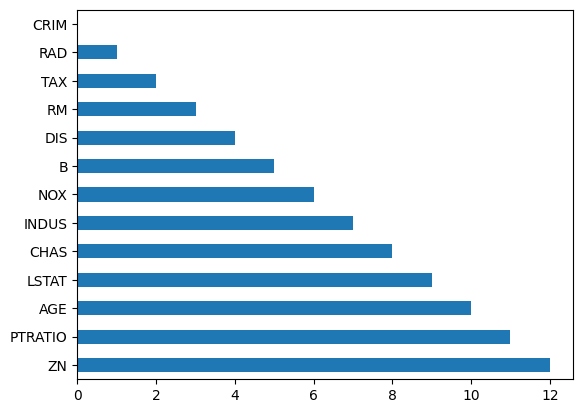

In [36]:
fisher_rank = fisher_score.fisher_score(x.to_numpy(), y)

s1 = pd.Series(fisher_rank, index=x.columns)

s1.sort_values(ascending=False).plot(kind = 'barh')

## 3. Missing Value Ratio

In [37]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [40]:
Credit Cards

1234  >> 1
4578  >> 1
....  >> 0
4789  >> 1
....  >> 0
1646
1234
....
1234
1234
....
1234

SyntaxError: invalid syntax (3351278176.py, line 1)

In [41]:
boston_df.isna().mean() * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
PRICE      0.0
dtype: float64